In [38]:
import numpy as np
import numpy.linalg.linalg as la
import matplotlib.pyplot as plt
import math
import random

In [39]:
def PenumbraBlurringModel(distances, detectorresolution, collimation) :
    resolution = np.sqrt(detectorresolution**2 + (distances/collimation)**2)
    
    return resolution

In [40]:
def FitCollimationRatio(distance,resolution,weighted=True) :
    H=np.array((np.ones(distance.size,), np.transpose(distance**2)))
    H=np.transpose(H)
               
    r2 = np.transpose(resolution**2)   

    if (weighted==True) :
        C=la.inv(np.diag(distance))        
    else :
        C=np.diag(np.ones(distance.size,))
        
    CH=np.dot(C,H)
    HCy=np.dot(np.transpose(H),np.dot(C,np.transpose(r2)))
        
    theta=np.dot(la.inv(np.dot(np.transpose(H),CH)),HCy)
    print(theta)
    return np.sqrt(theta[0]),1/np.sqrt(theta[1]),np.sqrt(np.dot(H,theta))

$$H=\left[\begin{array}[cc] a 1 & d_1^2\\ \vdots &\vdots\\ 1 & d_N^2 \end{array}\right] \qquad C=diag\left(\left[\begin{array}[ccc]a d_1 & \cdots & d_N\end{array}\right]\right) \qquad y^T=\left[\begin{array}[ccc]a y_1^2 & \cdots & y_N^2\end{array}\right] $$

LD = 499.9999999999999 , resolution = 0.09999999999999996


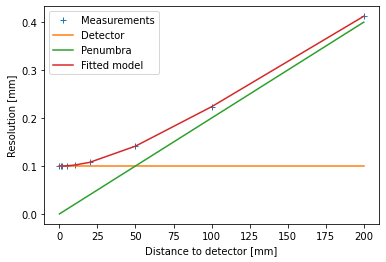

In [13]:
distances = np.array([0.05,1.0,2.0,5.0,10.0,20.0,50.0,100.0,200.0]) # [mm]
detectorresolution_true = 0.1 # [mm]
LD_true = 500

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

res,LD,fit = FitCollimationRatio(distances,resolution,True)
print("LD =",LD,", resolution =",res)
plt.plot(distances,resolution,'+',
         distances,res*np.ones(distances.size,),
         distances,distances/LD,
         distances,fit)
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [mm]")
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))

[2.85731284e-03 9.07230515e-06]
SE of regression: 0.06984208042303149
LD = 332.00236346375704 , resolution = 0.053453838359092065


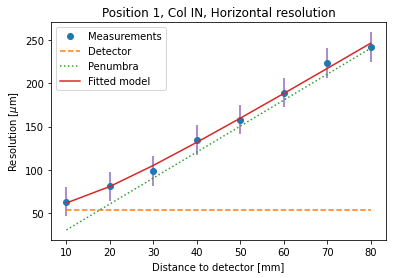

In [54]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([62.83,80.88,98.41,134.55,157.92,189.25,223.70,242.45])  # Replace the values with the your resolution measurements
detectorresolution_true = 0.03362 # [mm]
res_observed=res_observed/1000
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i]*1000)-(fit[i]*1000))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD,", resolution =",res)
plt.plot(distances,res_observed*1000,'o')
plt.plot(distances,res*1000*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances*1000/LD,linestyle="dotted")
plt.plot(distances,fit*1000)
plt.errorbar(distances,res_observed*1000,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 1, Col IN, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[4.30775357e-03 1.18005671e-05]
SE of regression: 0.07367871178198371
LD = 291.10425984965144 , resolution = 0.06563347902504084


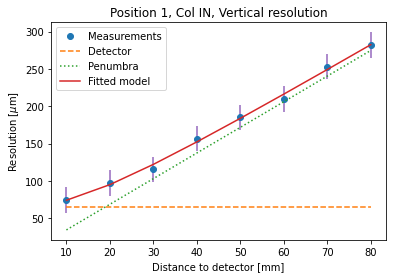

[4.14474616e-03 1.20020684e-05]
[5.39260418e-03 1.18157496e-05]
[5.24935016e-03 1.14717518e-05]
[6.19741514e-03 1.09428673e-05]
[6.49660661e-03 1.01124823e-05]
[9.35268077e-03 8.53441559e-06]
[8.19406300e-03 9.39037143e-06]
[9.54840498e-03 8.57501656e-06]
[9.52720572e-03 9.02625754e-06]
[9.04638926e-03 9.38656654e-06]
[8.06898235e-03 1.01159872e-05]
[8.57336952e-03 9.89129404e-06]
[1.04458733e-02 8.64379303e-06]
[1.26814768e-02 8.78804338e-06]
[1.38864341e-02 8.45685992e-06]
[1.29889496e-02 8.25339815e-06]
[1.52307603e-02 7.23921627e-06]
[1.43344056e-02 7.76945827e-06]
[1.33450197e-02 8.01628782e-06]
[1.17219393e-02 8.35222997e-06]
[1.12947514e-02 7.35917595e-06]
[1.22694280e-02 7.61249651e-06]
[1.50757164e-02 6.54551349e-06]
[1.20266857e-02 7.58102120e-06]
[1.00232883e-02 8.53650181e-06]
[1.17547564e-02 8.18334432e-06]
[9.69777146e-03 9.02386783e-06]
[1.05660525e-02 8.79240011e-06]
[8.60885255e-03 9.19915181e-06]
[7.41475186e-03 9.53602967e-06]
[8.00256358e-03 9.96041092e-06]
[9.27762

<ipython-input-40-b5557ea68b6a>:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(theta[0]),1/np.sqrt(theta[1]),np.sqrt(np.dot(H,theta))



[ 1.42155582e-01 -2.55118673e-05]
[ 1.45959785e-01 -2.59152766e-05]
[ 1.48518229e-01 -2.64414772e-05]
[ 1.53288408e-01 -2.82688478e-05]
[ 1.51540766e-01 -2.67505202e-05]
[ 1.52781784e-01 -2.70697271e-05]
[ 1.45657705e-01 -2.54348968e-05]
[ 1.38842212e-01 -2.36633562e-05]
[ 1.30982485e-01 -2.18524941e-05]
[ 1.27659165e-01 -2.16067531e-05]
[ 1.21343788e-01 -2.01046389e-05]
[ 1.14696450e-01 -1.77235524e-05]
[ 1.13805695e-01 -1.77088252e-05]
[ 1.07480889e-01 -1.69304942e-05]
[ 1.02323218e-01 -1.64204176e-05]
[ 1.06000590e-01 -1.69216944e-05]
[ 1.06749737e-01 -1.67103466e-05]
[ 1.01006375e-01 -1.45293593e-05]
[ 1.00113570e-01 -1.51137498e-05]
[ 9.39250984e-02 -1.32425954e-05]
[ 9.82656774e-02 -1.31638077e-05]
[ 1.02926332e-01 -1.50320979e-05]
[ 1.07497532e-01 -1.61481497e-05]
[ 1.07242120e-01 -1.64608845e-05]
[ 1.13308587e-01 -1.73287667e-05]
[ 1.17730609e-01 -1.89895811e-05]
[ 1.13008298e-01 -1.71629263e-05]
[ 1.11971632e-01 -1.63149453e-05]
[ 1.11138759e-01 -1.57789993e-05]
[ 1.17840439e

[ 1.59392753e-01 -1.01548263e-05]
[ 1.57691135e-01 -8.75872000e-06]
[ 1.57329925e-01 -9.11597917e-06]
[ 1.52809310e-01 -8.59832164e-06]
[ 1.49960793e-01 -8.78868517e-06]
[ 1.47987016e-01 -9.21270181e-06]
[ 1.53997970e-01 -1.04853727e-05]
[ 1.55655080e-01 -1.05618021e-05]
[ 1.63108522e-01 -1.30691350e-05]
[ 1.65489864e-01 -1.31599280e-05]
[ 1.73978057e-01 -1.56317873e-05]
[ 1.77772446e-01 -1.70898818e-05]
[ 1.70386947e-01 -1.52904706e-05]
[ 1.78074517e-01 -1.60528555e-05]
[ 1.69791606e-01 -1.49970128e-05]
[ 1.65569191e-01 -1.41267548e-05]
[ 1.63655589e-01 -1.29454535e-05]
[ 1.67170287e-01 -1.27152288e-05]
[ 1.71725808e-01 -1.32995197e-05]
[ 1.66653755e-01 -1.24379021e-05]
[ 1.60990936e-01 -1.13225176e-05]
[ 1.56296700e-01 -9.58989345e-06]
[ 1.59833090e-01 -9.81683187e-06]
[ 1.68103662e-01 -1.17151477e-05]
[ 1.73673262e-01 -1.30506608e-05]
[ 1.71424489e-01 -1.27226237e-05]
[ 1.68270733e-01 -1.17765344e-05]
[ 1.63601410e-01 -9.96357535e-06]
[ 1.64496611e-01 -1.10833629e-05]
[ 1.60090504e-

[1.61496940e-01 1.60165609e-05]
[1.52639556e-01 1.96404207e-05]
[1.56453271e-01 1.95244817e-05]
[1.59189071e-01 1.91884141e-05]
[1.60842141e-01 1.64552321e-05]
[1.61424539e-01 1.79712698e-05]
[1.56037419e-01 1.87233793e-05]
[1.52953123e-01 2.11431444e-05]
[1.54966028e-01 2.12976600e-05]
[1.56496855e-01 1.93734253e-05]
[1.50977353e-01 2.06656758e-05]
[1.61962111e-01 1.79643119e-05]
[1.61366831e-01 1.68412736e-05]
[1.57610190e-01 1.59172248e-05]
[1.64768596e-01 1.36175514e-05]
[1.60328032e-01 1.42097984e-05]
[1.70749168e-01 1.21267846e-05]
[1.72924189e-01 9.29772350e-06]
[1.66935267e-01 1.08598800e-05]
[1.60709757e-01 1.24797539e-05]
[1.63933440e-01 1.03879333e-05]
[1.55970959e-01 1.31254857e-05]
[1.61586589e-01 1.17995810e-05]
[1.59447042e-01 1.02150611e-05]
[1.70529316e-01 8.22690208e-06]
[1.68643893e-01 8.68391325e-06]
[1.69429509e-01 8.39827660e-06]
[1.62534576e-01 1.03414097e-05]
[1.59833149e-01 1.37240653e-05]
[1.59510474e-01 1.47151118e-05]
[1.68740512e-01 1.21033377e-05]
[1.70879

[ 3.32277995e-01 -4.31746249e-05]
[ 3.42206907e-01 -4.64311941e-05]
[ 3.39784702e-01 -4.47760738e-05]
[ 3.52622636e-01 -4.83503751e-05]
[ 3.50696579e-01 -4.90470794e-05]
[ 3.41023675e-01 -4.79448312e-05]
[ 3.50230843e-01 -5.21599870e-05]
[ 3.65113512e-01 -5.51736833e-05]
[ 3.70681239e-01 -5.77550328e-05]
[ 3.81788334e-01 -6.12385304e-05]
[ 3.99434074e-01 -6.66256789e-05]
[ 4.0253761e-01 -6.7165539e-05]
[ 3.89387342e-01 -6.41688643e-05]
[ 3.97158504e-01 -6.56290000e-05]
[ 3.96640403e-01 -6.54143313e-05]
[ 3.82687336e-01 -6.12927899e-05]
[ 3.90882571e-01 -6.34479987e-05]
[ 3.89287860e-01 -6.27339238e-05]
[ 3.85036276e-01 -6.31126348e-05]
[ 3.93165788e-01 -6.56683497e-05]
[ 4.01099055e-01 -6.68514908e-05]
[ 4.12705022e-01 -6.94753710e-05]
[ 4.08433154e-01 -6.71001045e-05]
[ 4.14224566e-01 -6.95277975e-05]
[ 4.07330591e-01 -6.82405548e-05]
[ 4.06141013e-01 -6.77028664e-05]
[ 4.19331530e-01 -7.03006139e-05]
[ 4.29037245e-01 -7.15435481e-05]
[ 4.14849554e-01 -6.85774744e-05]
[ 4.17482542e-01

[ 6.34076229e-01 -1.21290157e-04]
[ 6.52301822e-01 -1.27563198e-04]
[ 6.57505107e-01 -1.28613944e-04]
[ 6.61952576e-01 -1.29925774e-04]
[ 6.52411803e-01 -1.28884372e-04]
[ 6.52959712e-01 -1.29816501e-04]
[ 6.63933194e-01 -1.32799514e-04]
[ 6.57894345e-01 -1.30553346e-04]
[ 6.67694848e-01 -1.33072882e-04]
[ 6.62927502e-01 -1.32193338e-04]
[ 6.67438893e-01 -1.33507596e-04]
[ 6.89025388e-01 -1.39996024e-04]
[ 6.85063006e-01 -1.39064095e-04]
[ 6.6746304e-01 -1.3388714e-04]
[ 6.49449635e-01 -1.28600510e-04]
[ 6.40115558e-01 -1.25707929e-04]
[ 6.57993818e-01 -1.29950326e-04]
[ 6.66584391e-01 -1.32881195e-04]
[ 6.82868836e-01 -1.36884396e-04]
[ 6.97114193e-01 -1.40520099e-04]
[ 6.95684155e-01 -1.39245127e-04]
[ 6.89909479e-01 -1.38833412e-04]
[ 6.93627430e-01 -1.40427693e-04]
[ 6.79222356e-01 -1.36259300e-04]
[ 6.57316068e-01 -1.30792069e-04]
[ 6.71942489e-01 -1.36249303e-04]
[ 6.57319064e-01 -1.33125505e-04]
[ 6.71836847e-01 -1.37452710e-04]
[ 6.73781711e-01 -1.38600616e-04]
[ 6.75547803e-01

[ 5.54278860e-01 -7.87956849e-05]
[ 5.76006614e-01 -8.53570609e-05]
[ 5.76499365e-01 -8.62892045e-05]
[ 5.85041824e-01 -8.78594798e-05]
[ 5.80642612e-01 -8.73354184e-05]
[ 5.91559782e-01 -8.94011107e-05]
[ 5.78689648e-01 -8.72265355e-05]
[ 5.73895605e-01 -8.51023632e-05]
[ 5.82303643e-01 -8.84890329e-05]
[ 5.80734608e-01 -8.84964941e-05]
[ 5.87608987e-01 -9.08576842e-05]
[ 5.88913769e-01 -9.18351700e-05]
[ 6.08176878e-01 -9.53436836e-05]
[ 6.06972334e-01 -9.25170290e-05]
[ 6.07779292e-01 -9.22257511e-05]
[ 6.20461930e-01 -9.59953941e-05]
[ 6.21390709e-01 -9.59437319e-05]
[ 6.22554598e-01 -9.69649654e-05]
[ 6.36315185e-01 -9.93291645e-05]
[ 6.37959189e-01 -1.00480116e-04]
[ 6.26922479e-01 -9.90454420e-05]
[ 6.47387612e-01 -1.04845982e-04]
[ 6.57839161e-01 -1.08359768e-04]
[ 6.64126102e-01 -1.09066992e-04]
[ 6.60264085e-01 -1.09286564e-04]
[ 6.56493051e-01 -1.09689392e-04]
[ 6.57737790e-01 -1.08010947e-04]
[ 6.70018279e-01 -1.12000500e-04]
[ 6.55449840e-01 -1.08476843e-04]
[ 6.53690024e-

[ 7.20946527e-01 -1.18323644e-04]
[ 7.44117209e-01 -1.25230785e-04]
[ 7.43059054e-01 -1.22981476e-04]
[ 7.48047417e-01 -1.22653780e-04]
[ 7.51622778e-01 -1.21817421e-04]
[ 7.51315467e-01 -1.20749223e-04]
[ 7.42795554e-01 -1.18214587e-04]
[ 7.55296253e-01 -1.23386914e-04]
[ 7.42781923e-01 -1.21653574e-04]
[ 7.5664748e-01 -1.2568960e-04]
[ 7.56466572e-01 -1.26032807e-04]
[ 7.50555781e-01 -1.22593942e-04]
[ 7.42876990e-01 -1.23328986e-04]
[ 7.32666367e-01 -1.21481287e-04]
[ 7.14803841e-01 -1.17199549e-04]
[ 7.19840070e-01 -1.19146316e-04]
[ 7.17226133e-01 -1.19146196e-04]
[ 7.21356044e-01 -1.18640030e-04]
[ 7.33663561e-01 -1.20368906e-04]
[ 7.26235454e-01 -1.20071400e-04]
[ 7.40175316e-01 -1.24045321e-04]
[ 7.41356641e-01 -1.22113380e-04]
[ 7.63924666e-01 -1.28222216e-04]
[ 7.69885626e-01 -1.27415117e-04]
[ 7.53645883e-01 -1.21533622e-04]
[ 7.70013933e-01 -1.23954789e-04]
[ 7.77186508e-01 -1.24422323e-04]
[ 7.89003123e-01 -1.28520806e-04]
[ 8.11065461e-01 -1.32942599e-04]
[ 8.10398890e-01

[ 5.83813391e-01 -7.84162742e-05]
[ 5.83974726e-01 -8.12595461e-05]
[ 5.97247745e-01 -8.51569888e-05]
[ 5.96994479e-01 -8.57013578e-05]
[ 6.06398285e-01 -8.88819816e-05]
[ 6.13537320e-01 -9.08846578e-05]
[ 6.02829837e-01 -8.73150644e-05]
[ 6.10003026e-01 -8.79423772e-05]
[ 5.95610996e-01 -8.56549592e-05]
[ 5.81633062e-01 -8.26687866e-05]
[ 5.87493035e-01 -8.53146696e-05]
[ 5.75375638e-01 -8.24511678e-05]
[ 5.65656946e-01 -7.90873149e-05]
[ 5.52554598e-01 -7.37271268e-05]
[ 5.45683335e-01 -7.29564360e-05]
[ 5.50407689e-01 -7.33298811e-05]
[ 5.46391653e-01 -7.16945268e-05]
[ 5.34860175e-01 -6.77918834e-05]
[ 5.39415863e-01 -6.92962796e-05]
[ 5.43520561e-01 -7.03443430e-05]
[ 5.44661706e-01 -6.91402676e-05]
[ 5.55175461e-01 -7.04028453e-05]
[ 5.69719996e-01 -7.52292197e-05]
[ 5.78824396e-01 -7.62396812e-05]
[ 5.82893069e-01 -7.98585611e-05]
[ 5.79994120e-01 -7.92248774e-05]
[ 5.85917941e-01 -8.07679210e-05]
[ 5.97864461e-01 -8.43921571e-05]
[ 5.99514005e-01 -8.36619317e-05]
[ 6.13808430e-

[ 6.82599456e-01 -9.48908470e-05]
[ 6.83593882e-01 -9.66554712e-05]
[ 6.70656802e-01 -9.36537973e-05]
[ 6.65432893e-01 -9.12875383e-05]
[ 6.57718628e-01 -9.06078514e-05]
[ 6.53266852e-01 -9.07330967e-05]
[ 6.53493906e-01 -9.20355273e-05]
[ 6.50805084e-01 -8.95182746e-05]
[ 6.65867223e-01 -9.41805084e-05]
[ 6.64070328e-01 -9.41222400e-05]
[ 6.79791060e-01 -9.92985341e-05]
[ 6.75822846e-01 -9.79074264e-05]
[ 6.60910470e-01 -9.51362987e-05]
[ 6.71698836e-01 -9.77164850e-05]
[ 6.68952368e-01 -9.64945559e-05]
[ 6.59089697e-01 -9.44677338e-05]
[ 6.48388979e-01 -9.06996946e-05]
[ 6.55088345e-01 -9.21560923e-05]
[ 6.68580485e-01 -9.53316503e-05]
[ 6.65123820e-01 -9.48708838e-05]
[ 6.59155048e-01 -9.30309752e-05]
[ 6.47368443e-01 -8.89839449e-05]
[ 6.32814282e-01 -8.44394956e-05]
[ 6.49349116e-01 -8.90554912e-05]
[ 6.44673463e-01 -8.80701669e-05]
[ 6.61151893e-01 -9.06891607e-05]
[ 6.70438692e-01 -9.31213041e-05]
[ 6.65195118e-01 -9.27189131e-05]
[ 6.59757455e-01 -9.16873207e-05]
[ 6.77887832e-

[ 6.63401504e-01 -6.45715982e-05]
[ 6.72818002e-01 -6.87639628e-05]
[ 6.56814808e-01 -6.50904000e-05]
[ 6.54735041e-01 -6.40284536e-05]
[ 6.40047574e-01 -6.00363803e-05]
[ 6.53486313e-01 -6.40699768e-05]
[ 6.44303716e-01 -6.00099510e-05]
[ 6.58809148e-01 -6.50946317e-05]
[ 6.69598657e-01 -6.94703213e-05]
[ 6.59806150e-01 -6.65384788e-05]
[ 6.74784429e-01 -6.85916074e-05]
[ 6.84691241e-01 -6.92539376e-05]
[ 6.89594487e-01 -6.80201311e-05]
[ 6.87235604e-01 -6.79829722e-05]
[ 7.02050208e-01 -7.14978276e-05]
[ 7.07180652e-01 -7.12520008e-05]
[ 7.13807600e-01 -7.39890191e-05]
[ 6.97159481e-01 -7.02660022e-05]
[ 6.84158091e-01 -6.64745405e-05]
[ 6.86448506e-01 -6.68847675e-05]
[ 6.90567209e-01 -6.72745288e-05]
[ 7.09946960e-01 -6.99560573e-05]
[ 7.13757253e-01 -7.07630987e-05]
[ 7.07981565e-01 -7.14047540e-05]
[ 7.19072877e-01 -7.31897760e-05]
[ 7.29515424e-01 -7.69069118e-05]
[ 7.43890947e-01 -8.12891473e-05]
[ 7.41147495e-01 -7.98770006e-05]
[ 7.35384695e-01 -7.82870867e-05]
[ 7.47656816e-

[ 6.73624167e-01 -3.70588072e-05]
[ 6.75328592e-01 -3.71241846e-05]
[ 6.62936501e-01 -3.36302136e-05]
[ 6.56521876e-01 -3.22397468e-05]
[ 6.44303005e-01 -2.82421861e-05]
[ 6.41572216e-01 -2.92127171e-05]
[ 6.57432024e-01 -2.99606491e-05]
[ 6.51666084e-01 -3.09860123e-05]
[ 6.54932832e-01 -2.93088010e-05]
[ 6.58371636e-01 -3.19023589e-05]
[ 6.61694304e-01 -3.31978875e-05]
[ 6.68864115e-01 -3.52438743e-05]
[ 6.73585737e-01 -3.57386562e-05]
[ 6.62320431e-01 -3.23790024e-05]
[ 6.73699502e-01 -3.37977762e-05]
[ 6.82480560e-01 -3.41297418e-05]
[ 6.96027236e-01 -4.01672015e-05]
[ 6.87122328e-01 -3.56479820e-05]
[ 6.93324044e-01 -3.76844778e-05]
[ 6.97982183e-01 -3.96106737e-05]
[ 7.17827466e-01 -4.77554862e-05]
[ 7.22471446e-01 -4.90963968e-05]
[ 7.09968009e-01 -4.39413772e-05]
[ 7.23924910e-01 -4.85157069e-05]
[ 7.31828837e-01 -5.02039122e-05]
[ 7.42411805e-01 -5.42333157e-05]
[ 7.52301318e-01 -5.86488825e-05]
[ 7.67111260e-01 -6.05670572e-05]
[ 7.74234781e-01 -6.05555891e-05]
[ 7.64891848e-

[ 8.55158881e-01 -7.91061551e-05]
[ 8.55736498e-01 -7.92073712e-05]
[ 8.65431143e-01 -7.99877325e-05]
[ 8.70434026e-01 -7.96306937e-05]
[ 8.91351607e-01 -8.17616634e-05]
[ 8.77201647e-01 -7.75214162e-05]
[ 8.88114922e-01 -7.72306234e-05]
[ 8.80568962e-01 -7.41218785e-05]
[ 8.78003486e-01 -7.18777394e-05]
[ 8.69329505e-01 -6.87643339e-05]
[ 8.88864815e-01 -7.55499315e-05]
[ 9.07134008e-01 -8.04757450e-05]
[ 8.92667440e-01 -7.52052026e-05]
[ 8.88622397e-01 -7.67183773e-05]
[ 8.73299488e-01 -7.34337893e-05]
[ 8.91737964e-01 -7.89303271e-05]
[ 8.78475368e-01 -7.51423580e-05]
[ 8.59808128e-01 -7.10169277e-05]
[ 8.55304423e-01 -7.24108851e-05]
[ 8.80387669e-01 -7.68292367e-05]
[ 8.84035694e-01 -7.93806986e-05]
[ 8.95135317e-01 -8.48082888e-05]
[ 8.94851272e-01 -8.58167836e-05]
[ 8.69300839e-01 -7.87512835e-05]
[ 8.54200116e-01 -7.34620269e-05]
[ 8.52203207e-01 -7.16168439e-05]
[ 8.46005953e-01 -6.92309700e-05]
[ 8.42512413e-01 -6.60807411e-05]
[ 8.50828241e-01 -6.66400740e-05]
[ 8.59984566e-

[5.10837368e-01 5.10054159e-05]
[5.05110404e-01 5.66019843e-05]
[4.99468079e-01 5.68486359e-05]
[4.85221172e-01 6.20273337e-05]
[4.85557201e-01 5.97514224e-05]
[4.84763450e-01 5.88422014e-05]
[4.72220836e-01 6.22919580e-05]
[4.71453710e-01 5.90174101e-05]
[4.67734384e-01 5.71426926e-05]
[4.52377409e-01 5.89929704e-05]
[4.39012819e-01 6.30030635e-05]
[4.39170529e-01 6.21785144e-05]
[4.56144112e-01 5.71346889e-05]
[4.55039736e-01 5.61067676e-05]
[4.73444366e-01 5.09439500e-05]
[4.63104696e-01 5.16977439e-05]
[4.54192289e-01 5.32206907e-05]
[4.62172892e-01 5.12382695e-05]
[4.66674504e-01 5.27239078e-05]
[4.67371007e-01 5.36918936e-05]
[4.72770498e-01 5.48025095e-05]
[4.60428904e-01 5.42435034e-05]
[4.61446387e-01 5.51538799e-05]
[4.73616435e-01 5.12759515e-05]
[4.74129934e-01 5.22774410e-05]
[4.77916195e-01 4.92330969e-05]
[4.78839299e-01 4.95955583e-05]
[4.77024166e-01 5.09724320e-05]
[4.77187794e-01 5.18835179e-05]
[4.80419460e-01 5.06223521e-05]
[4.73923662e-01 5.43966546e-05]
[4.78454

[6.06895310e-01 3.73762084e-05]
[6.05142129e-01 4.13585488e-05]
[6.12166940e-01 3.68817867e-05]
[6.14962392e-01 3.48341907e-05]
[6.21662902e-01 3.45808648e-05]
[6.26394801e-01 3.32943604e-05]
[6.28414593e-01 3.34228867e-05]
[6.36524346e-01 3.32041833e-05]
[6.20664340e-01 3.76367954e-05]
[6.30936862e-01 3.24990755e-05]
[6.42108425e-01 2.88202318e-05]
[6.46421391e-01 2.60422944e-05]
[6.48007626e-01 2.71633577e-05]
[6.58225851e-01 2.56914654e-05]
[6.47392191e-01 2.69310696e-05]
[6.46588988e-01 3.18505427e-05]
[6.50166564e-01 3.18089239e-05]
[6.55296988e-01 2.99226781e-05]
[6.38415503e-01 3.24940430e-05]
[6.34430930e-01 3.50885817e-05]
[6.19220874e-01 3.90563387e-05]
[6.30027577e-01 3.30031750e-05]
[6.20561786e-01 3.32810959e-05]
[6.05761928e-01 3.70300877e-05]
[5.91529393e-01 4.35270888e-05]
[5.92337445e-01 4.31356084e-05]
[5.88344386e-01 4.37915035e-05]
[5.94278316e-01 4.28115013e-05]
[6.01297525e-01 4.04915829e-05]
[5.92136972e-01 4.18712322e-05]
[5.81371819e-01 4.11372429e-05]
[5.94908

[6.33798223e-01 4.39142513e-05]
[6.20434468e-01 4.87673524e-05]
[6.30143327e-01 4.35258905e-05]
[6.19224086e-01 4.64755272e-05]
[6.03093768e-01 4.64438205e-05]
[6.02508249e-01 4.58279217e-05]
[5.97373242e-01 4.56712214e-05]
[5.90030999e-01 4.68307856e-05]
[5.88634301e-01 4.71070567e-05]
[6.07524495e-01 4.44992593e-05]
[6.14837699e-01 4.14803516e-05]
[6.14412615e-01 4.14429383e-05]
[6.27705696e-01 3.88099019e-05]
[6.1593519e-01 4.4500883e-05]
[6.10662539e-01 4.52625320e-05]
[6.25291515e-01 4.04670087e-05]
[6.20440393e-01 4.29910672e-05]
[6.11729418e-01 4.56712823e-05]
[6.16840538e-01 4.49320473e-05]
[6.21162466e-01 4.44465736e-05]
[6.16648707e-01 4.69499966e-05]
[6.02828815e-01 4.92084339e-05]
[6.00056292e-01 5.02734595e-05]
[6.09281428e-01 4.49307053e-05]
[6.18276326e-01 4.21752674e-05]
[6.14845638e-01 4.47972595e-05]
[5.97601089e-01 5.00218067e-05]
[5.95954218e-01 5.06855600e-05]
[5.82676535e-01 5.12215987e-05]
[5.63237879e-01 5.69764181e-05]
[5.66702687e-01 5.55482474e-05]
[5.6433225

[1.92187840e-01 9.44218495e-05]
[1.97122390e-01 9.17464322e-05]
[1.91216899e-01 9.35643351e-05]
[1.95289151e-01 9.16511236e-05]
[1.97097933e-01 8.79137535e-05]
[1.85026729e-01 9.39900999e-05]
[1.83165896e-01 9.67000519e-05]
[1.88296880e-01 9.71744894e-05]
[1.85488651e-01 9.59481433e-05]
[1.81753034e-01 9.96487998e-05]
[1.88660559e-01 9.83363435e-05]
[1.92584967e-01 9.63890087e-05]
[2.02594940e-01 9.40645247e-05]
[1.98385643e-01 9.45997869e-05]
[1.92255667e-01 9.58579876e-05]
[1.87631124e-01 9.43842314e-05]
[1.84519287e-01 9.57002039e-05]
[1.77402665e-01 9.67905965e-05]
[1.80944375e-01 9.78865204e-05]
[1.7091837e-01 1.0192677e-04]
[1.75315147e-01 1.01176018e-04]
[1.84344406e-01 9.86689207e-05]
[1.88344222e-01 1.00611983e-04]
[1.83434320e-01 1.01272475e-04]
[1.88026081e-01 1.02919927e-04]
[1.98001063e-01 1.02049193e-04]
[2.07559297e-01 1.00466382e-04]
[2.21857583e-01 9.75792878e-05]
[2.19923535e-01 1.00011136e-04]
[2.20945378e-01 1.01041919e-04]
[2.17738487e-01 1.02641000e-04]
[2.1952969

[4.06452037e-01 4.95283376e-05]
[3.9504344e-01 5.2268877e-05]
[3.93400145e-01 5.23587414e-05]
[4.04669397e-01 5.26442035e-05]
[3.91495369e-01 5.59986779e-05]
[4.00675003e-01 5.27962539e-05]
[4.15193530e-01 4.87933129e-05]
[4.24650525e-01 4.48535294e-05]
[4.1973719e-01 4.4634380e-05]
[4.17526516e-01 4.74691717e-05]
[4.09044847e-01 5.19670594e-05]
[3.93172995e-01 5.57777569e-05]
[3.82589164e-01 5.88264550e-05]
[3.82452899e-01 5.80842620e-05]
[3.78777748e-01 5.98533584e-05]
[3.72469076e-01 6.19511063e-05]
[3.65898815e-01 6.46047537e-05]
[3.63822176e-01 6.56793668e-05]
[3.68388083e-01 6.33013772e-05]
[3.67274938e-01 6.42112365e-05]
[3.62760151e-01 6.31351524e-05]
[3.50092779e-01 6.42215561e-05]
[3.57461066e-01 6.12713275e-05]
[3.56502796e-01 6.12943775e-05]
[3.45571139e-01 6.71738587e-05]
[3.36823603e-01 6.89399178e-05]
[3.53264324e-01 6.33676665e-05]
[3.56139633e-01 5.84543340e-05]
[3.47205671e-01 5.87314293e-05]
[3.52292618e-01 5.57838310e-05]
[3.62606437e-01 5.45763137e-05]
[3.69859667e

[3.25883563e-01 1.79450604e-05]
[3.19269873e-01 2.08787229e-05]
[3.20993846e-01 2.22013816e-05]
[3.29985621e-01 1.81235004e-05]
[3.30543314e-01 1.88752563e-05]
[3.32496620e-01 1.81381158e-05]
[3.33754624e-01 1.80866847e-05]
[3.28345662e-01 1.96169909e-05]
[3.37301475e-01 1.74271471e-05]
[3.24600592e-01 1.91748260e-05]
[3.32166166e-01 1.60357523e-05]
[3.27155385e-01 2.01562086e-05]
[3.34637657e-01 1.47726379e-05]
[3.39420319e-01 1.61509390e-05]
[3.36194699e-01 1.54319909e-05]
[3.37790316e-01 1.28531280e-05]
[3.34306249e-01 1.30278752e-05]
[3.44525620e-01 1.04470486e-05]
[3.40550227e-01 1.29803459e-05]
[3.44513497e-01 1.42278438e-05]
[3.34255211e-01 1.65042558e-05]
[3.20846107e-01 2.18399535e-05]
[3.18961418e-01 2.32375677e-05]
[3.19765597e-01 2.34572046e-05]
[3.08705142e-01 2.66247633e-05]
[2.95298173e-01 3.06265664e-05]
[3.09334393e-01 2.70511806e-05]
[3.06711745e-01 2.75268032e-05]
[2.99881288e-01 2.83545895e-05]
[3.06483144e-01 2.71603955e-05]
[2.97790182e-01 2.91857482e-05]
[3.04040

[3.00571283e-01 2.84214010e-05]
[2.91502324e-01 2.95690190e-05]
[2.8136738e-01 3.2338780e-05]
[2.79711640e-01 3.13933538e-05]
[2.75595308e-01 3.48233958e-05]
[2.69015585e-01 3.75705433e-05]
[2.67946028e-01 3.87216117e-05]
[2.72286549e-01 3.84579203e-05]
[2.72920531e-01 3.86122146e-05]
[2.60171342e-01 3.92286211e-05]
[2.64864882e-01 4.09184954e-05]
[2.56633140e-01 4.02754964e-05]
[2.50012208e-01 4.19933243e-05]
[2.44117628e-01 4.46897574e-05]
[2.56130350e-01 4.02934625e-05]
[2.46140272e-01 4.23372639e-05]
[2.48148721e-01 4.03357911e-05]
[2.52848673e-01 3.97288593e-05]
[2.47727062e-01 4.00450758e-05]
[2.37598880e-01 4.25025951e-05]
[2.39297122e-01 4.29047528e-05]
[2.32586062e-01 4.19913860e-05]
[2.29700545e-01 4.25356519e-05]
[2.26932186e-01 4.42159512e-05]
[2.29520794e-01 4.40667974e-05]
[2.20578060e-01 4.74026381e-05]
[2.15068646e-01 4.70436017e-05]
[2.21843218e-01 4.42137806e-05]
[2.18126254e-01 4.43623309e-05]
[2.28449585e-01 3.96716743e-05]
[2.27072994e-01 4.26643848e-05]
[2.2101859

[2.32582575e-01 7.86982248e-05]
[2.23631578e-01 8.05172148e-05]
[2.22642898e-01 8.04410325e-05]
[2.29305192e-01 7.63434701e-05]
[2.36770020e-01 7.47949299e-05]
[2.35016988e-01 7.45529472e-05]
[2.26762645e-01 7.55618531e-05]
[2.35592743e-01 7.37770991e-05]
[2.31365294e-01 7.39474611e-05]
[2.34189410e-01 7.49452188e-05]
[2.37624553e-01 7.50899708e-05]
[2.41881109e-01 7.30210350e-05]
[2.38562344e-01 7.18992592e-05]
[2.47792941e-01 6.83015202e-05]
[2.53264234e-01 6.60611686e-05]
[2.45924172e-01 6.81256029e-05]
[2.44040381e-01 7.02442365e-05]
[2.42471820e-01 7.05876152e-05]
[2.47104434e-01 7.15724508e-05]
[2.50428574e-01 6.99042774e-05]
[2.37552438e-01 7.27164096e-05]
[2.36923760e-01 7.33055545e-05]
[2.41891500e-01 7.21858948e-05]
[2.35959718e-01 7.53121693e-05]
[2.31132765e-01 7.15690819e-05]
[2.40108952e-01 6.89139069e-05]
[2.47370835e-01 6.63804632e-05]
[2.41811345e-01 6.79068282e-05]
[2.3874543e-01 6.9544171e-05]
[2.31109032e-01 7.13249072e-05]
[2.27623384e-01 7.50013609e-05]
[2.3505320

[2.47635775e-01 6.59218666e-05]
[2.36789287e-01 6.89694160e-05]
[2.37046284e-01 7.01633486e-05]
[2.43328746e-01 6.87907150e-05]
[2.52082354e-01 6.41162162e-05]
[2.56722775e-01 6.30008913e-05]
[2.56531693e-01 6.12683067e-05]
[2.61897623e-01 6.01580888e-05]
[2.61362979e-01 5.82730656e-05]
[2.58976028e-01 5.91557424e-05]
[2.65806797e-01 6.07181585e-05]
[2.69817662e-01 6.18636292e-05]
[2.59709083e-01 6.30669013e-05]
[2.6846115e-01 6.3973455e-05]
[2.73088609e-01 5.94986116e-05]
[2.71670755e-01 6.02282899e-05]
[2.74228816e-01 6.22328871e-05]
[2.70210358e-01 6.47465764e-05]
[2.62385366e-01 6.62159011e-05]
[2.62911788e-01 6.79530757e-05]
[2.59745774e-01 6.87308936e-05]
[2.56551295e-01 7.07854891e-05]
[2.54981702e-01 7.25780846e-05]
[2.60588734e-01 7.27922656e-05]
[2.53220040e-01 7.32520711e-05]
[2.48468163e-01 7.14624547e-05]
[2.39224073e-01 7.46240746e-05]
[2.36243315e-01 7.63516739e-05]
[2.29956465e-01 7.80783307e-05]
[2.33086444e-01 7.81365997e-05]
[2.29495266e-01 7.94321390e-05]
[2.2101819

[6.94360996e-01 2.75453978e-05]
[7.00216506e-01 2.19699184e-05]
[7.10309896e-01 1.65513001e-05]
[7.18024432e-01 1.31222786e-05]
[7.35889462e-01 1.11343625e-05]
[7.53529902e-01 4.11394014e-06]
[7.54283387e-01 8.33224077e-06]
[7.62568302e-01 5.06913094e-06]
[7.48951124e-01 1.08474540e-05]
[7.50731703e-01 1.06268363e-05]
[7.67781139e-01 7.56874738e-06]
[7.72640261e-01 5.40775819e-06]
[7.67527045e-01 5.86806704e-06]
[7.51371594e-01 7.09949908e-06]
[7.65356050e-01 3.50849313e-06]
[7.76455294e-01 1.52834016e-07]
[7.61369578e-01 5.43469483e-06]
[7.50538057e-01 6.94038083e-06]
[7.44172835e-01 6.74362326e-06]
[7.29719847e-01 1.01607008e-05]
[7.34776536e-01 9.39090103e-06]
[7.39579210e-01 6.60357896e-06]
[7.49415089e-01 3.73792014e-06]
[7.52271570e-01 2.42761431e-06]
[7.40524559e-01 5.64300851e-06]
[7.29415542e-01 9.78752177e-06]
[7.51724908e-01 3.38047846e-06]
[7.43338289e-01 5.86178108e-06]
[7.45628999e-01 4.40900226e-06]
[7.47041502e-01 8.00064533e-06]
[7.38472491e-01 1.03002285e-05]
[7.42695

[7.02661057e-01 1.28918830e-05]
[7.01911133e-01 1.47697751e-05]
[7.10628227e-01 1.38167427e-05]
[6.94028493e-01 1.65911497e-05]
[6.78712927e-01 2.18256727e-05]
[6.94640033e-01 1.78581013e-05]
[6.97487924e-01 1.44665038e-05]
[7.21546135e-01 6.92011914e-06]
[7.17428231e-01 8.02649077e-06]
[7.25766795e-01 6.20481346e-06]
[7.13657089e-01 8.90873967e-06]
[7.28559812e-01 5.07966740e-06]
[7.41547059e-01 4.97055205e-06]
[7.35339025e-01 8.05685940e-06]
[7.15845744e-01 1.32786568e-05]
[6.99697741e-01 1.52356289e-05]
[6.87902720e-01 1.75775361e-05]
[6.89628044e-01 2.04931007e-05]
[7.0869122e-01 1.4560825e-05]
[6.93341879e-01 1.96553353e-05]
[6.80049922e-01 2.23136423e-05]
[6.86034388e-01 1.82587181e-05]
[6.81157789e-01 2.14428125e-05]
[6.75854627e-01 2.23822594e-05]
[6.72278711e-01 2.41750842e-05]
[6.84485443e-01 2.01332282e-05]
[6.82520982e-01 2.14698461e-05]
[6.92137885e-01 2.01376820e-05]
[6.93695239e-01 2.28842953e-05]
[6.78227685e-01 2.61800248e-05]
[6.93553877e-01 2.13263226e-05]
[6.8967824

[ 7.04978686e-01 -1.20244892e-05]
[ 7.14106540e-01 -1.22803608e-05]
[ 7.15721154e-01 -1.18492946e-05]
[ 7.21546617e-01 -1.49200191e-05]
[ 7.05598231e-01 -1.21849644e-05]
[ 6.91503337e-01 -6.85641623e-06]
[ 6.8316543e-01 -4.9373504e-06]
[ 6.68648066e-01 -8.31411397e-07]
[ 6.76568293e-01 -2.67664502e-06]
[ 6.66171512e-01 -3.62322890e-07]
[ 6.79683172e-01 -3.36912213e-06]
[ 6.80695249e-01 -2.72489388e-07]
[6.84820340e-01 1.10421786e-06]
[6.64850493e-01 4.74456301e-06]
[6.56032011e-01 8.03805232e-06]
[6.45820764e-01 1.13222174e-05]
[6.31820954e-01 1.46165974e-05]
[6.32553389e-01 1.37431321e-05]
[6.17237723e-01 1.84468476e-05]
[6.04909158e-01 2.38761266e-05]
[6.19294618e-01 2.14899038e-05]
[6.24426587e-01 1.89496564e-05]
[6.19899664e-01 1.99138485e-05]
[6.22664595e-01 1.81792229e-05]
[6.02078658e-01 2.46041593e-05]
[6.11335895e-01 2.29640439e-05]
[5.98712665e-01 2.72418676e-05]
[6.12265712e-01 2.17222690e-05]
[6.18950911e-01 1.80732322e-05]
[6.03056837e-01 2.09875972e-05]
[6.07024744e-01 1.

[6.96667901e-01 7.74756504e-05]
[7.08270952e-01 7.24220186e-05]
[6.9979006e-01 7.4546725e-05]
[6.98568095e-01 7.69394561e-05]
[6.99055962e-01 7.60364130e-05]
[7.03141075e-01 7.43101628e-05]
[7.08109644e-01 7.52432513e-05]
[7.07113896e-01 7.25754707e-05]
[7.00958031e-01 7.20657380e-05]
[7.13289841e-01 7.26971934e-05]
[6.98885221e-01 7.71093170e-05]
[7.06090815e-01 7.44312462e-05]
[6.94857041e-01 8.08714312e-05]
[6.91663413e-01 7.92545494e-05]
[6.94374208e-01 7.45344199e-05]
[6.73353546e-01 8.33474004e-05]
[6.80366338e-01 8.39028165e-05]
[6.92349088e-01 8.24518169e-05]
[6.77681015e-01 8.42204317e-05]
[6.85012021e-01 8.12713236e-05]
[7.02077982e-01 7.82765507e-05]
[7.07098424e-01 7.63307034e-05]
[6.88238671e-01 8.21285468e-05]
[6.89831414e-01 8.13087585e-05]
[6.87595220e-01 7.66112109e-05]
[6.73741718e-01 7.90830501e-05]
[6.66715575e-01 8.45454785e-05]
[6.56829601e-01 8.57377202e-05]
[6.61053414e-01 8.44026036e-05]
[6.65717834e-01 8.50650612e-05]
[6.62377700e-01 8.45335037e-05]
[6.6711935

[6.69567300e-01 1.23990249e-04]
[6.76982013e-01 1.24702454e-04]
[6.66176893e-01 1.25109365e-04]
[6.59502769e-01 1.25944173e-04]
[6.50893150e-01 1.25611549e-04]
[6.51699428e-01 1.21196874e-04]
[6.53644750e-01 1.22686807e-04]
[6.41258706e-01 1.26876613e-04]
[6.37907551e-01 1.26837385e-04]
[6.39775079e-01 1.25963220e-04]
[6.41597868e-01 1.29006955e-04]
[6.40548097e-01 1.32040789e-04]
[6.42313082e-01 1.30985207e-04]
[6.43229490e-01 1.29685189e-04]
[6.30186303e-01 1.31799721e-04]
[6.35732237e-01 1.29220925e-04]
[6.28011963e-01 1.32578446e-04]
[6.29629667e-01 1.32033742e-04]
[6.35492102e-01 1.30256018e-04]
[6.32049155e-01 1.28217249e-04]
[6.24955676e-01 1.30642863e-04]
[6.21531435e-01 1.31394028e-04]
[6.19410125e-01 1.30810470e-04]
[6.07395602e-01 1.34032133e-04]
[6.02754025e-01 1.35340294e-04]
[5.94908086e-01 1.38355438e-04]
[5.94739378e-01 1.36484389e-04]
[5.92279839e-01 1.38353995e-04]
[5.79431618e-01 1.39457506e-04]
[5.77636053e-01 1.36414435e-04]
[5.78078805e-01 1.37132072e-04]
[5.89171

In [55]:

distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([74.52,97.25,115.55,156.81,185.09,209.95,253.19,282.19])  # Replace the values with the your resolution measurements
detectorresolution_true = 0.03362 # [mm]
res_observed=res_observed/1000
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i]*1000)-(fit[i]*1000))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD,", resolution =",res)
plt.plot(distances,res_observed*1000,'o')
plt.plot(distances,res*1000*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances*1000/LD,linestyle="dotted")
plt.plot(distances,fit*1000)
plt.errorbar(distances,res_observed*1000,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")
plt.title("Position 1, Col IN, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

LD_array=[]
for i in range(10000):
    distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
    res_applied = res_observed  # Replace the values with the your resolution measurements
    for j in range(len(res_applied)):
        res_applied[j] = res_applied[j] + random.random()*detectorresolution_true - detectorresolution_true/2
        if res_applied[j] < detectorresolution_true*1.5:
            res_applied[j] = detectorresolution_true*1.5


    resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

    # Run the estimator
    res,LD,fit = FitCollimationRatio(distances,res_applied)
    LD_array.append(LD)
print("Average LD: ",np.average(LD_array))
print("Error: ",np.std(LD_array))

[2.85731284e-03 9.07230515e-06]
SE of regression: 0.06984208042303149
LD = 332.00236346375704 , resolution = 0.053453838359092065


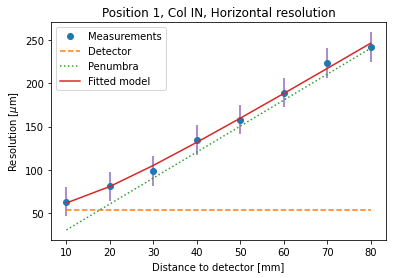

In [56]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([62.83,80.88,98.41,134.55,157.92,189.25,223.70,242.45])  # Replace the values with the your resolution measurements
detectorresolution_true = 0.03362 # [mm]
res_observed=res_observed/1000
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i]*1000)-(fit[i]*1000))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD,", resolution =",res)

plt.plot(distances,res_observed*1000,'o')
plt.plot(distances,res*1000*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances*1000/LD,linestyle="dotted")
plt.plot(distances,fit*1000)
plt.errorbar(distances,res_observed*1000,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 1, Col IN, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[7.74399377e+03 6.37083830e+00]
SE of regression: 0.10361817765770992
LD = 396.1883572268906 , resolution = 87.99996461010825


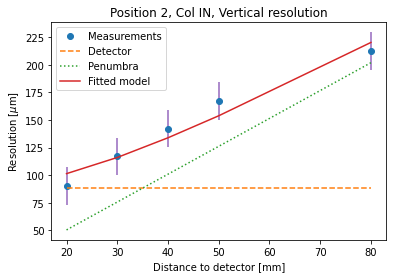

[6499.20477277    6.6082369 ]
LD = 389.0068046095106 , resolution = 80.61764554219452


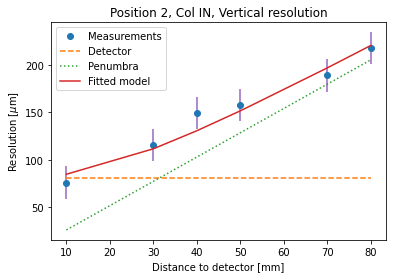

In [96]:
distances = np.array([20,30,40,50,80])  # Replace the values with the distances for your observations
res_observed  = np.array([90.12,117.10,142.26,167.12,212.51])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col IN, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

distances = np.array([10,30,40,50,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([75.83,115.53,149.68,157.92,189.16,217.89])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)

# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col IN, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3095.14250541    7.13271601]
SE of regression: 0.032169698897620204
LD = 374.43163447393914 , resolution = 55.63400493767646


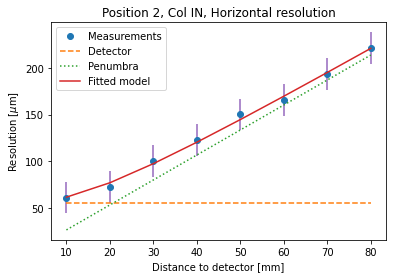

In [70]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([61.26,72.95,100.16,123.11,150.09,165.53,193.80,221.01])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col IN, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2259.10298325   10.01495988]
SE of regression: 0.03697541588257225
LD = 315.99149458773934 , resolution = 47.530021915127364


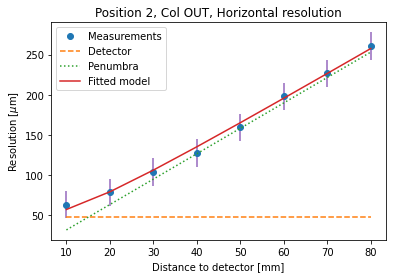

In [71]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([63.29,78.66,103.70,127.53,159.40,197.86,226.53,260.87])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col OUT, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[4757.26028803   33.34826071]
SE of regression: 0.014808550446767254
LD = 173.1663113252434 , resolution = 68.97289531427701


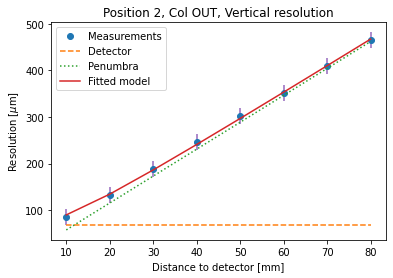

In [72]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([85.65,132.42,189.16,245.96,301.99,351.29,410.07,464.75])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col OUT, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[5050.10088404    8.62791767]
SE of regression: 0.03794193520612954
LD = 340.44503416377484 , resolution = 71.06406183182811


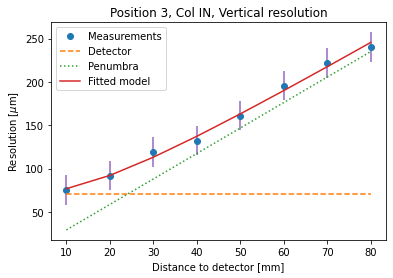

In [73]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([75.22,92,118.92,132.42,161.10,195.63,221.59,240.24])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col IN, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2990.33490404    5.71187907]
SE of regression: 0.040728627201294915
LD = 418.4181337019067 , resolution = 54.68395472204352


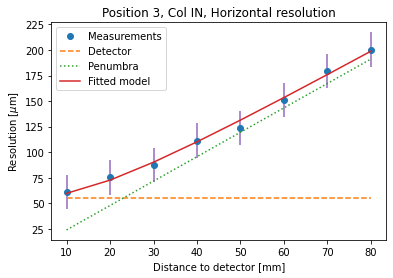

In [74]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([60.9,75.45,87.39,111.37,123.72,151.10,179.48,200.4])
# Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col IN, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3007.96050753   28.36364003]
SE of regression: 0.019729782092083103
LD = 187.76689190280345 , resolution = 54.84487676648218


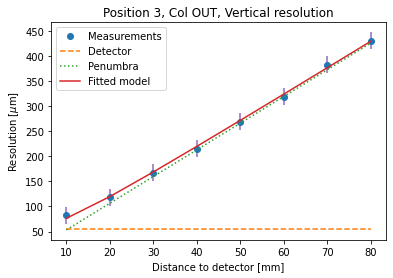

In [75]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([82.36,118.71,167.69,215.2,269.03,318.88,382.52,430.61])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col OUT, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2709.45702123    7.28189396]
SE of regression: 0.035548603203770776
LD = 370.5764570962827 , resolution = 52.052444911155916


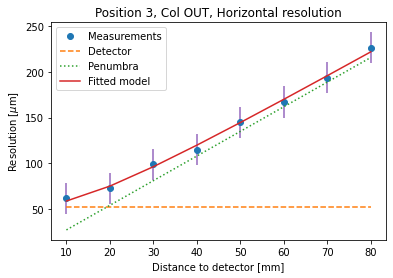

In [76]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([61.48,72.64,98.93,114.76,144.69,167.12,193.51,226.53]) # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col OUT, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2984.28752529    4.23748764]
SE of regression: 0.08553945178444122
LD = 485.7868758358035 , resolution = 54.62863283384023


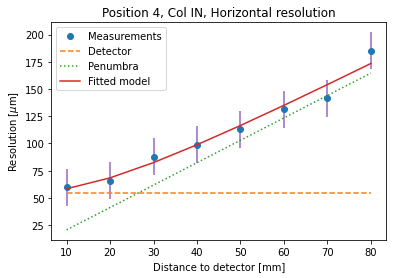

In [77]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([60,65.7,87.83,98.96,113.25,131.52,141.33,185.18])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col IN, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[4828.12022231    6.35287683]
SE of regression: 0.07059625156531424
LD = 396.74803315575934 , resolution = 69.48467616902755


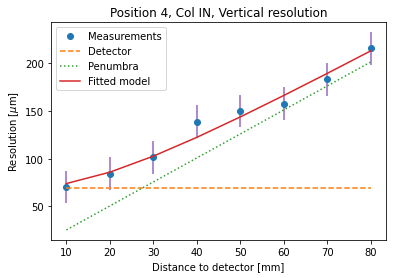

In [78]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([70.03,84.4,101.29,138.9,150.09,157.92,183.31,215.80])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col IN, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2883.15309633   21.98525747]
SE of regression: 0.030669119843340024
LD = 213.2721867946441 , resolution = 53.69500066418774


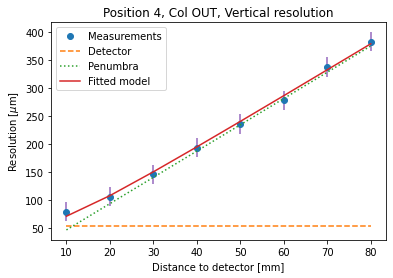

In [79]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([79.32,106.26,145.97,193.41,235.8,278.28,337.52,382.52])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col OUT, Vertical resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2752.64625978    5.6861596 ]
SE of regression: 0.028188612723170168
LD = 419.363354105075 , resolution = 52.46566743864852


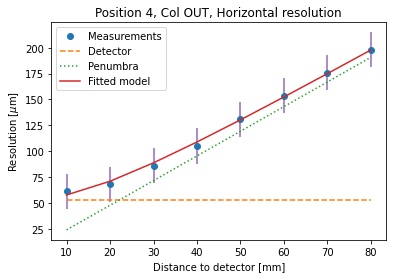

In [80]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([61.27,68.04,85.95,105,130.77,153.7,175.66,197.96])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col OUT, Horizontal resolution")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

In [81]:
distances_AA = np.array([10,20,30,40,50,60,70,80])

P1_IN_VERT = np.array([74.52,97.25,115.55,156.81,185.09,209.95,253.19,282.19])
P1_IN_HOR = np.array([62.83,80.88,98.41,134.55,157.92,189.25,223.70,242.45])

P2_IN_VERT = np.array([72.48,89.2,116.31,145.97,162.52,172.57,183.31,215.2])
P2_IN_HOR = np.array([61.26,72.95,100.16,123.11,150.09,165.53,193.80,221.01])
P2_OUT_VERT = np.array([85.65,132.42,189.16,245.96,301.99,351.29,410.07,464.75])
P2_OUT_HOR = np.array([63.29,78.66,103.70,127.53,159.40,197.86,226.53,260.87])

P3_IN_VERT = np.array([75.22,92,118.92,132.42,161.10,195.63,221.59,240.24])
P3_IN_HOR = np.array([60.9,75.45,87.39,111.37,123.72,151.10,179.48,200.4])
P3_OUT_VERT = np.array([82.36,118.71,167.69,215.2,269.03,318.88,382.52,430.61])
P3_OUT_HOR = np.array([61.48,72.64,98.93,114.76,144.69,167.12,193.51,226.53])

P4_IN_VERT = np.array([70.03,84.4,101.29,138.9,150.09,157.92,183.31,215.80])
P4_IN_HOR = np.array([60,65.7,87.83,98.96,113.25,131.52,141.33,185.18])
P4_OUT_VERT = np.array([79.32,106.26,145.97,193.41,235.8,278.28,337.52,382.52])
P4_OUT_HOR = np.array([61.27,68.04,85.95,105,130.77,153.7,175.66,197.96])

distances_positions = np.array([4920,5920,6920,7920])

LD_IN_VERT = np.array([291,391,340,396])
LD_IN_VERT = np.array([291,340,396])
LD_IN_HOR = np.array([332,374,418,485])
LD_OUT_VERT = np.array([170,187,213])
LD_OUT_HOR = np.array([315,370,419])

<ipython-input-23-3e1061ce8176>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c = np.linalg.lstsq(A,angles)[0]


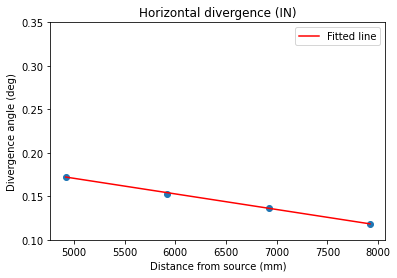

In [23]:
angles = []
for i in LD_IN_HOR:
    angles.append(np.arctan(1/i)*360/(2*math.pi))
plt.plot(distances_positions,angles,'o')

A = np.vstack([distances_positions, np.ones(len(distances_positions))]).T

m,c = np.linalg.lstsq(A,angles)[0]
plt.plot(distances_positions, m*distances_positions + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Distance from source (mm)")
plt.ylabel("Divergence angle (deg)")
plt.title("Horizontal divergence (IN)")
plt.ylim(0.1,0.35)
plt.show()
plt.close()

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

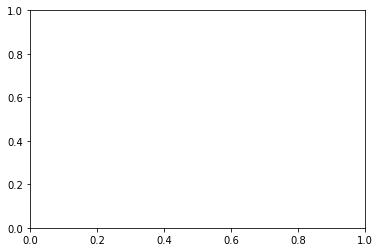

In [24]:

angles = []
for i in LD_IN_VERT:
    angles.append(np.arctan(1/i)*360/(2*math.pi))
plt.plot(distances_positions,angles,'o')

A = np.vstack([distances_positions, np.ones(len(distances_positions))]).T

m,c = np.linalg.lstsq(A,angles)[0]
plt.plot(distances_positions, m*distances_positions + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Distance from source (mm)")
plt.ylabel("Divergence angle (deg)")
plt.title("Vertical divergence (IN)")
plt.ylim(0.1,0.35)
plt.show()
plt.close()

In [ ]:
angles = []
for i in LD_OUT_VERT:
    angles.append(np.arctan(1/i)*360/(2*math.pi))
plt.plot(distances_positions[1:],angles,'o')

A = np.vstack([distances_positions[1:], np.ones(len(distances_positions[1:]))]).T

m,c = np.linalg.lstsq(A,angles)[0]
plt.plot(distances_positions, m*distances_positions + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Distance from source (mm)")
plt.ylabel("Divergence angle (deg)")
plt.title("Vertical divergence (OUT)")
plt.ylim(0.1,0.35)
plt.show()
plt.close()

In [ ]:
angles = []
for i in LD_OUT_HOR:
    angles.append(np.arctan(1/i)*360/(2*math.pi))
plt.plot(distances_positions[1:],angles,'o')

A = np.vstack([distances_positions[1:], np.ones(len(distances_positions[1:]))]).T

m,c = np.linalg.lstsq(A,angles,rcond=None)[0]
plt.plot(distances_positions, m*distances_positions + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Distance from source (mm)")
plt.ylabel("Divergence angle (deg)")
plt.title("Horizontal divergence (OUT)")
plt.ylim(0.1,0.35)
plt.show()
plt.close()

In [ ]:

LD_array = []
for i in range(10000):
    distances = np.array([10,20,30,40,50,60])  # Replace the values with the distances for your observations
    res_observed  = np.array([64,85,110,145,167.5,195]) # Replace the values with the your resolution measurements
    for j in range(len(res_observed)):
        res_observed[j] = res_observed[j] + random.random()*33.65 - 17

    detectorresolution_true = 0.03362 # [mm]
    LD_true = 160

    resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

    # Run the estimator
    res,LD,fit = FitCollimationRatio(distances,res_observed/1000)
    LD_array.append(LD)
print("Average LD: ",np.average(LD_array))
print("Error: ",np.std(LD_array))

In [ ]:
distances_AA = np.array([10,20,30,40,50,60,70,80])

P1_IN_VERT = np.array([74.52,97.25,115.55,156.81,185.09,209.95,253.19,282.19])
P1_IN_HOR = np.array([62.83,80.88,98.41,134.55,157.92,189.25,223.70,242.45])

P2_IN_VERT = np.array([72.48,89.2,116.31,145.97,162.52,172.57,183.31,215.2])
P2_IN_HOR = np.array([61.26,72.95,100.16,123.11,150.09,165.53,193.80,221.01])
P2_OUT_VERT = np.array([85.65,132.42,189.16,245.96,301.99,351.29,410.07,464.75])
P2_OUT_HOR = np.array([63.29,78.66,103.70,127.53,159.40,197.86,226.53,260.87])

P3_IN_VERT = np.array([75.22,92,118.92,132.42,161.10,195.63,221.59,240.24])
P3_IN_HOR = np.array([60.9,75.45,87.39,111.37,123.72,151.10,179.48,200.4])
P3_OUT_VERT = np.array([82.36,118.71,167.69,215.2,269.03,318.88,382.52,430.61])
P3_OUT_HOR = np.array([61.48,72.64,98.93,114.76,144.69,167.12,193.51,226.53])

P4_IN_VERT = np.array([70.03,84.4,101.29,138.9,150.09,157.92,183.31,215.80])
P4_IN_HOR = np.array([60,65.7,87.83,98.96,113.25,131.52,141.33,185.18])
P4_OUT_VERT = np.array([79.32,106.26,145.97,193.41,235.8,278.28,337.52,382.52])
P4_OUT_HOR = np.array([61.27,68.04,85.95,105,130.77,153.7,175.66,197.96])

distances_positions = np.array([4920,5920,6920,7920])

LD_IN_VERT = np.array([291,391,340,396])
LD_IN_VERT = np.array([291,340,396])
LD_IN_HOR = np.array([332,374,418,485])
LD_OUT_VERT = np.array([170,187,213])
LD_OUT_HOR = np.array([315,370,419])

[3300.69786535    9.93339217]
SE of regression: 0.025502904350786136
LD = 317.28621877165057 , resolution = 57.451700282524584


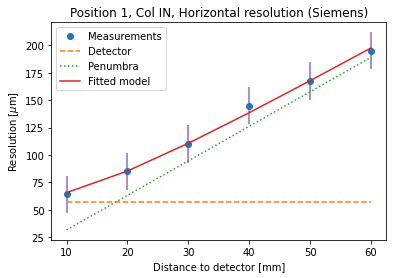

In [82]:
distances = np.array([10,20,30,40,50,60])  # Replace the values with the distances for your observations
res_observed  = np.array([64,85,110,145,167.5,195])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 1, Col IN, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[5064.95648604   11.54874521]
SE of regression: 0.05281662166231297
LD = 294.2609278212526 , resolution = 71.16850768452778


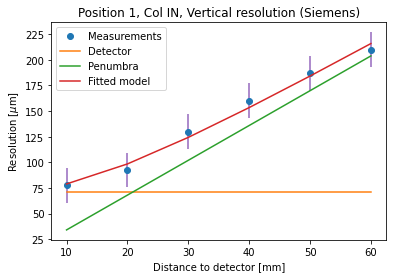

In [83]:
distances = np.array([10,20,30,40,50,60])  # Replace the values with the distances for your observations
res_observed  = np.array([77.5,92.5,130,160,187,210])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o',
        distances,res*np.ones(distances.size,),
         distances,distances/LD,
         distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 1, Col IN, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[4517.3019432   10.8559891]
SE of regression: 0.049386175040870076
LD = 303.5046160135561 , resolution = 67.21087667333914


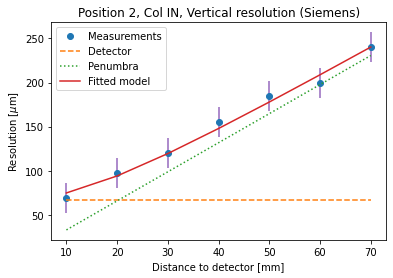

In [84]:
distances = np.array([10,20,30,40,50,60,70])  # Replace the values with the distances for your observations
res_observed  = np.array([69,98,120,155,185,200,240])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col IN, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3137.56352765    8.10013037]
SE of regression: 0.06195861012604405
LD = 351.36135682293934 , resolution = 56.01395832873456


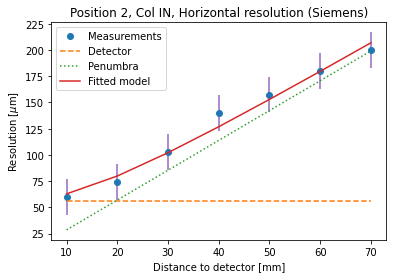

In [85]:
distances = np.array([10,20,30,40,50,60,70])  # Replace the values with the distances for your observations
res_observed  = np.array([60,74,102.5,140,157.5,180,200])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col IN, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3425.42040359    6.65216491]
SE of regression: 0.04109692574643715
LD = 387.72026115286747 , resolution = 58.52709119362966


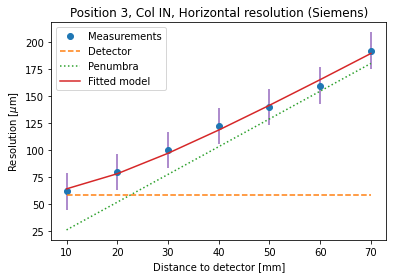

In [86]:
distances = np.array([10,20,30,40,50,60,70])  # Replace the values with the distances for your observations
res_observed  = np.array([61.5,79.5,100,122.5,140,160,192.5])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col IN, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[4914.07830908    9.44661598]
SE of regression: 0.04509217439607749
LD = 325.35828452073594 , resolution = 70.10048722425766


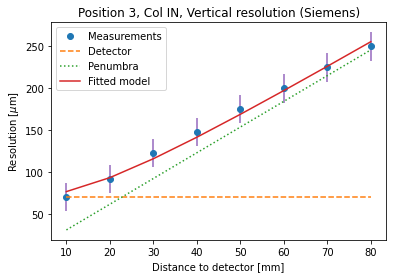

In [87]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([70,91.5,122.5,147.5,175,200,225,250])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col IN, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[5873.69252874    8.17038451]
SE of regression: 0.0381672439502372
LD = 349.84748181554573 , resolution = 76.64001910709332


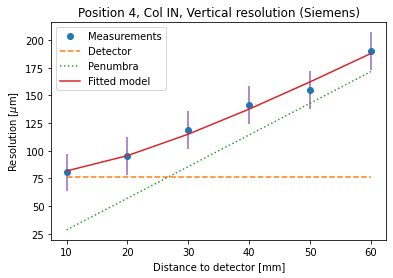

In [88]:
distances = np.array([10,20,30,40,50,60])  # Replace the values with the distances for your observations
res_observed  = np.array([80.5,95.5,118.5,141.5,155,190])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col IN, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2948.38935089    5.74296283]
SE of regression: 0.03105103941591174
LD = 417.28425396752425 , resolution = 54.299073204699845


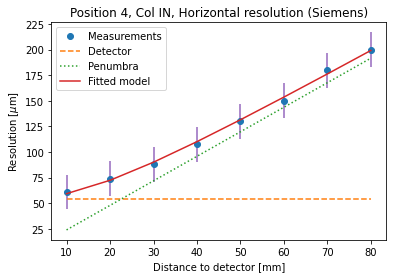

In [89]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([61,74,88,107.5,130,150,180,200])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col IN, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[2838.66995074   11.03988506]
SE of regression: 0.049595543098385785
LD = 300.96619946741544 , resolution = 53.27916995166976


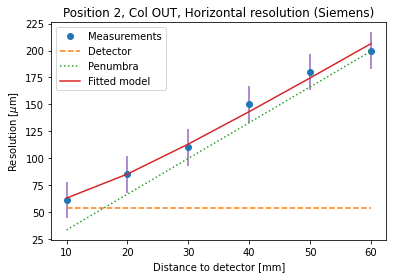

In [90]:
distances = np.array([10,20,30,40,50,60])  # Replace the values with the distances for your observations
res_observed  = np.array([61,85,110,150,180,200])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col OUT, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[6711.53846154   30.10096154]
SE of regression: 0.04332160046533527
LD = 182.26774291413074 , resolution = 81.92397977111744


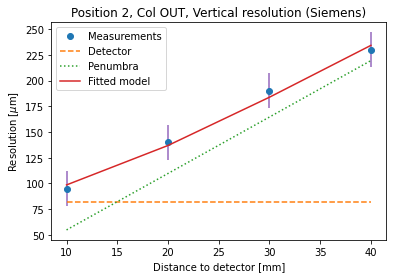

In [91]:
distances = np.array([10,20,30,40])  # Replace the values with the distances for your observations
res_observed  = np.array([95,140,190,230])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17],marker="None",fmt="o")

plt.title("Position 2, Col OUT, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[5285.96153846   26.34591346]
SE of regression: 0.04714362143671206
LD = 194.82440991430022 , resolution = 72.7046184121857


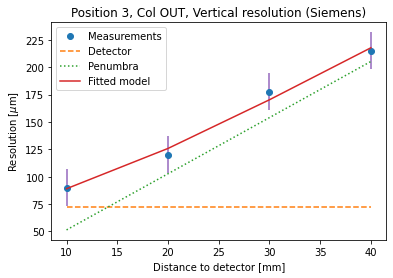

In [92]:
distances = np.array([10,20,30,40])  # Replace the values with the distances for your observations
res_observed  = np.array([90,120,177.5,215])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col OUT, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3270.42040359    8.66366682]
SE of regression: 0.02538621072822895
LD = 339.741913809114 , resolution = 57.187589594136966


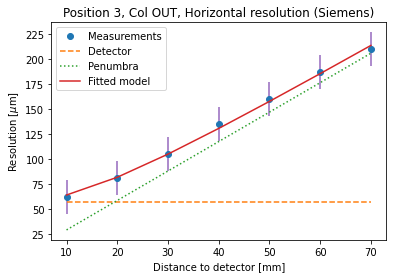

In [93]:
distances = np.array([10,20,30,40,50,60,70])  # Replace the values with the distances for your observations
res_observed  = np.array([62.5,81.5,105,135,160,187.5,210])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 3, Col OUT, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3526.97402597   21.19982843]
SE of regression: 0.03559250704377795
LD = 217.18700023702272 , resolution = 59.38833240607132


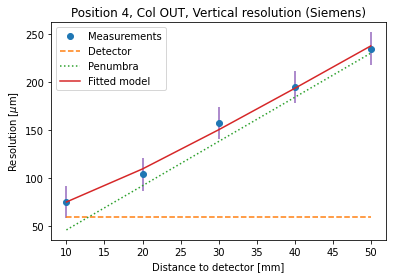

In [94]:
distances = np.array([10,20,30,40,50])  # Replace the values with the distances for your observations
res_observed  = np.array([75,104,157.5,195,235])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col OUT, Vertical resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()

[3194.49613075    7.19728888]
SE of regression: 0.012433670179422667
LD = 372.7481808969265 , resolution = 56.51987376795998


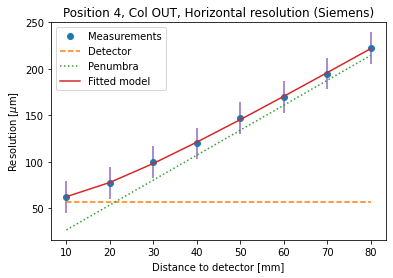

In [95]:
distances = np.array([10,20,30,40,50,60,70,80])  # Replace the values with the distances for your observations
res_observed  = np.array([62.5,77,100,120,147.5,170,195,222.5])  # Replace the values with the your resolution measurements
res_observed =res_observed

detectorresolution_true = 0.03362 # [mm]
LD_true = 160

resolution = PenumbraBlurringModel(distances,detectorresolution_true,LD_true)

# Run the estimator
res,LD,fit = FitCollimationRatio(distances,res_observed)
ssx = 0
for resolution in distances:
    ssx += (resolution - np.average(res_observed))**2
errorY = 0
for i in range(len(fit)):
    errorY += np.sqrt(((res_observed[i])-(fit[i]))**2/(len(fit)-2))
print("SE of regression:",errorY/np.sqrt(ssx))
# Display the results
print("LD =",LD*1000,", resolution =",res)
plt.plot(distances,res_observed,'o')
plt.plot(distances,res*np.ones(distances.size,),linestyle="dashed")
plt.plot(distances,distances/LD,linestyle="dotted")
plt.plot(distances,fit)
plt.errorbar(distances,res_observed,yerr=[17,17,17,17,17,17,17,17],marker="None",fmt="o")

plt.title("Position 4, Col OUT, Horizontal resolution (Siemens)")
plt.xlabel("Distance to detector [mm]")
plt.ylabel("Resolution [$\mu$m]") # adjust the label to quantity you measured
plt.legend(("Measurements","Detector","Penumbra","Fitted model"))
plt.show()
plt.close()